In [1]:
import pandas as pd

# Specify the file path
file_path = r"C:\Users\SRIVATSAL NARAYAN\Desktop\tiger\asign3.csv"

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())


   Store  Year  Month Super Division     Sales       SGM           Store Open  \
0      1  2015      2          GIRLS  63635.80  35692.09  1991-03-01 00:00:00   
1      1  2015      2           BOYS  20872.93  15691.34  1991-03-01 00:00:00   
2      1  2015      2    ACCESSORIES  38717.03  23866.25  1991-03-01 00:00:00   
3      1  2015      2           KIDS  11455.00  12110.00  1991-03-01 00:00:00   
4      1  2015      3          GIRLS  67507.77  42237.79  1991-03-01 00:00:00   

     Store Close Outlet Type State Climate  Total Sq Ft  \
0  No Close date      Outlet    A1  Frigid       4735.0   
1  No Close date      Outlet    A1  Frigid       4735.0   
2  No Close date      Outlet    A1  Frigid       4735.0   
3  No Close date      Outlet    A1  Frigid       4735.0   
4  No Close date      Outlet    A1  Frigid       4735.0   

  Store Modification Date Store Modification  
0     2011-10-06 00:00:00         relocation  
1     2011-10-06 00:00:00         relocation  
2     2011-10-06 

In [3]:
data.head()


,Store,Year,Month,Super Division,Sales,SGM,Store Open,Store Close,Outlet Type,State,Climate,Total Sq Ft,Store Modification Date,Store Modification
0,1,2015,2,GIRLS,63635.80,35692.09,1991-03-01 00:00:00,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
1,1,2015,2,BOYS,20872.93,15691.34,1991-03-01 00:00:00,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
2,1,2015,2,ACCESSORIES,38717.03,23866.25,1991-03-01 00:00:00,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
3,1,2015,2,KIDS,11455.00,12110.00,1991-03-01 00:00:00,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
4,1,2015,3,GIRLS,67507.77,42237.79,1991-03-01 00:00:00,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation


In [7]:
print("\nDataFrame Info:")
print(data.info())
print("\nRow and Column Names:")
print("Row names (index):", data.index)
print("Column names:", data.columns)
# Check for null values
print("\nNull Values in Each Column:")
print(data.isnull().sum())

# Display the data types of each column
print("\nData Types of Each Column:")
print(data.dtypes)

# Display basic statistics for numerical columns
print("\nBasic Statistics:")
print(data.describe())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181237 entries, 0 to 181236
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Store                    181237 non-null  int64  
 1   Year                     181237 non-null  int64  
 2   Month                    181237 non-null  int64  
 3   Super Division           181237 non-null  object 
 4   Sales                    181237 non-null  float64
 5   SGM                      181237 non-null  float64
 6   Store Open               181237 non-null  object 
 7   Store Close              181237 non-null  object 
 8   Outlet Type              181237 non-null  object 
 9   State                    181237 non-null  object 
 10  Climate                  181237 non-null  object 
 11  Total Sq Ft              181237 non-null  float64
 12  Store Modification Date  181237 non-null  object 
 13  Store Modification       181237 non-null  

Total Sales by Year

In [9]:
# Calculate total sales by year
total_sales_by_year = data.groupby('Year')['Sales'].sum()

print("Total Sales by Year:")
print(total_sales_by_year)



Total Sales by Year:
Year
2015    1.627585e+09
2016    1.843939e+09
2017    1.651322e+09
2018    1.492340e+09
2019    1.471963e+09
2020    6.510899e+07
Name: Sales, dtype: float64


Number of Stores Opened in 1991


In [10]:
# Convert 'Store Open' to datetime if not already
data['Store Open'] = pd.to_datetime(data['Store Open'])

# Count stores opened in 1991
stores_opened_1991 = data[data['Store Open'].dt.year == 1991].shape[0]

print("Number of Stores Opened in 1991:", stores_opened_1991)


Number of Stores Opened in 1991: 819


Count the number of stores that were remodeled during the period by checking

In [11]:
# Count remodeled stores
remodeled_stores = data[data['Store Modification'] != 'No Modifications'].shape[0]

print("Number of Stores Remodeled:", remodeled_stores)


Number of Stores Remodeled: 181237


Relationship Between Sales and Total Sq Ft


In [12]:
# Calculate correlation between Sales and Total Sq Ft
correlation = data['Sales'].corr(data['Total Sq Ft'])

print("Correlation between Sales and Total Sq Ft:", correlation)


Correlation between Sales and Total Sq Ft: 0.13922544019446761


Most Profitable Super Division


In [13]:
# Calculate average sales by super division
average_sales_by_division = data.groupby('Super Division')['Sales'].mean()

most_profitable_division = average_sales_by_division.idxmax()

print("Most Profitable Super Division:", most_profitable_division)


Most Profitable Super Division: GIRLS


Active Stores


In [14]:
# Convert 'Store Close' to datetime
data['Store Close'] = pd.to_datetime(data['Store Close'], errors='coerce')

# Count active stores (Store Close is null or in the future)
active_stores = data[data['Store Close'].isnull() | (data['Store Close'] > pd.Timestamp.now())].shape[0]

print("Number of Active Stores:", active_stores)


Number of Active Stores: 157484


C:\Users\SRIVATSAL NARAYAN\AppData\Local\Temp\ipykernel_22436\1260578028.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Store Close'] = pd.to_datetime(data['Store Close'], errors='coerce')


Super Division with More Sq Ft


In [15]:
# Calculate average square footage by super division
avg_sq_ft_by_division = data.groupby('Super Division')['Total Sq Ft'].mean()

largest_sq_ft_division = avg_sq_ft_by_division.idxmax()

print("Super Division with More Sq Ft on Average:", largest_sq_ft_division)


Super Division with More Sq Ft on Average: KIDS


Advanced Insights

Top 3 Potential Candidate States

In [17]:

top_states = data.groupby('State')['Sales'].mean().nlargest(3).index.tolist()

print("Top 3 Potential Candidate States:", top_states)


Top 3 Potential Candidate States: ['E4', 'B6', 'B5']


Best Time of Year to Open a Store


In [18]:
# Calculate average sales by month to determine trends
average_sales_by_month = data.groupby('Month')['Sales'].mean()

best_month_to_open = average_sales_by_month.idxmax()

print("Best Time of Year to Open a Store:", best_month_to_open)


Best Time of Year to Open a Store: 12


Outlet-Type Effects on Store Closures


In [19]:
# Analyze closures by outlet type
closure_rates_by_type = data.groupby('Outlet Type')['Store Close'].apply(lambda x: x.notnull().mean())

print("Outlet-Type Effects on Store Closures:")
print(closure_rates_by_type)


Outlet-Type Effects on Store Closures:
Outlet Type
Mall      0.059397
Outlet    0.225496
Strip     0.187519
Name: Store Close, dtype: float64


Additional

Sales Performance by Region


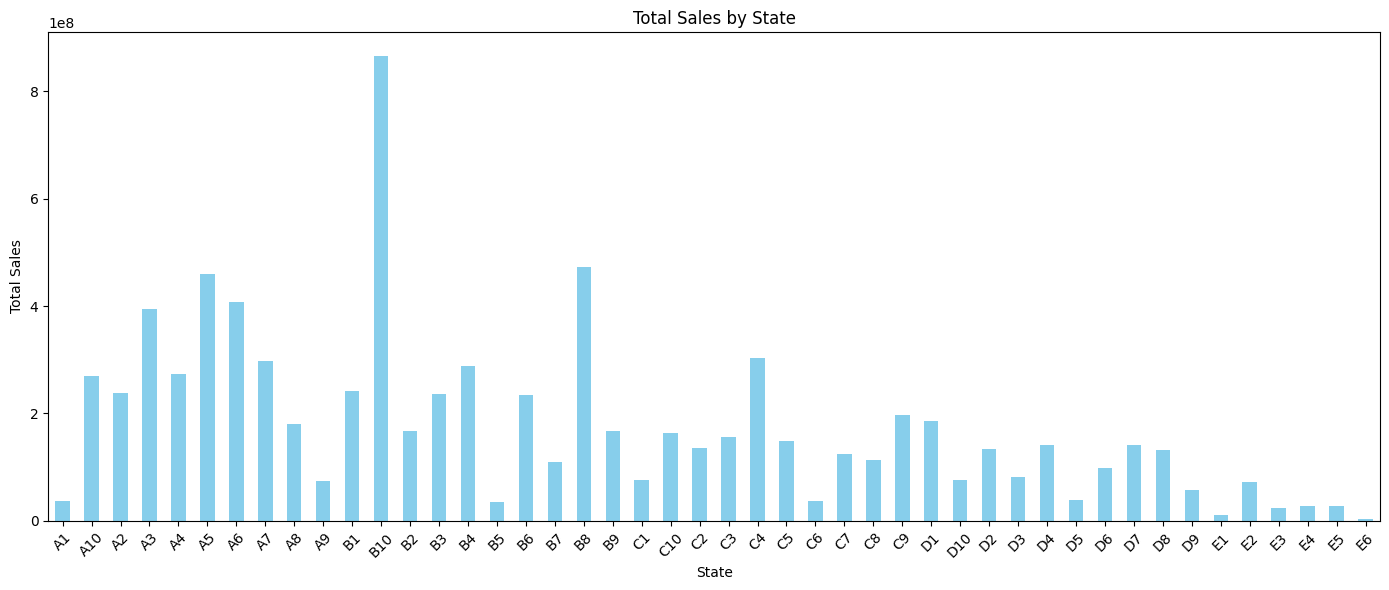

In [20]:
# Assuming 'State' as a proxy for region
import matplotlib.pyplot as plt

# Calculate total sales by state
sales_by_state = data.groupby('State')['Sales'].sum()

# Plot sales distribution across states
plt.figure(figsize=(14, 6))
sales_by_state.plot(kind='bar', color='skyblue')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Seasonal Sales Patterns

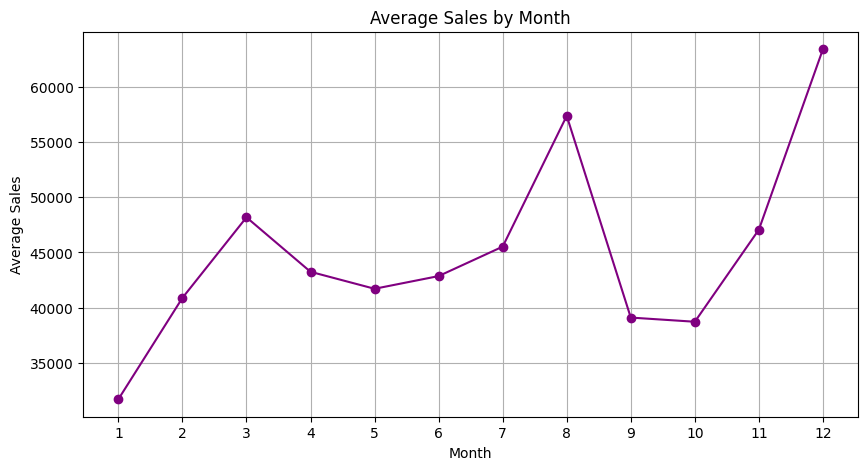

In [21]:
# Calculate average sales by month
average_sales_by_month = data.groupby('Month')['Sales'].mean()

# Plot seasonal sales patterns
plt.figure(figsize=(10, 5))
average_sales_by_month.plot(kind='line', marker='o', color='purple')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


Predicting Sales Based on Store Characteristics

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the data
data = pd.read_csv('asign3.csv')

# Select features and target variable
X = data[['Total Sq Ft', 'Year', 'Month', 'Store']]
y = data['Sales']

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(data[['Total Sq Ft', 'Year', 'Month', 'Store', 'Super Division', 'Outlet Type']], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse:.2f}")
print(f"Linear Regression - R-squared: {r2:.2f}")


Linear Regression - Mean Squared Error: 314516300.14
Linear Regression - R-squared: 0.63


Predicting Store Gross Margin (SGM) Based on Other Factors

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from tqdm import tqdm

# Load the data
data = pd.read_csv('asign3.csv')

# Select features and target variable
X = data[['Total Sq Ft', 'Year', 'Month', 'Store', 'Super Division', 'Outlet Type']]
y = data['SGM']

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest with tqdm for progress tracking
for _ in tqdm(range(1), desc="Training Random Forest"):
    rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression - Mean Squared Error: {mse:.2f}")
print(f"Random Forest Regression - R-squared: {r2:.2f}")


Training Random Forest: 100%|██████████| 1/1 [01:12<00:00, 72.71s/it]


Random Forest Regression - Mean Squared Error: 37979814.91
Random Forest Regression - R-squared: 0.84


Predicting Sales with Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Use PolynomialFeatures to transform the features
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Create a pipeline with polynomial features and linear regression
poly_model = make_pipeline(poly_features, LinearRegression())

# Train the polynomial regression model
poly_model.fit(X_train, y_train)

# Make predictions
y_pred = poly_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Polynomial Regression - Mean Squared Error: {mse:.2f}")
print(f"Polynomial Regression - R-squared: {r2:.2f}")


Polynomial Regression - Mean Squared Error: 0.00
Polynomial Regression - R-squared: 1.00
